In [2]:
%pylab inline
import pandas as pd
from functions import load_data
from constants import *
import pickle

Populating the interactive namespace from numpy and matplotlib


In [3]:
total_df = load_data(ALL_DAYS[0:20], ignore_auctions = True, correct_zero_volumes = True, num_minutes_interval=1)

2015-07-29 16:03:10,410 - INFO - Loading data for days:['20120924', '20120925', '20120926', '20120927', '20120928', '20121001', '20121002', '20121003', '20121004', '20121005', '20121008', '20121009', '20121010', '20121011', '20121012', '20121015', '20121016', '20121017', '20121018', '20121019']


In [4]:
open_prices = total_df[total_df.Time == '2015-07-29 09:30:00']
close_prices = total_df[total_df.Time == '2015-07-29 15:59:00']

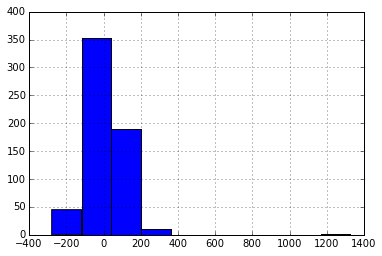

In [5]:
daily_sigma = \
    (((open_prices.reset_index().Price - close_prices.reset_index().Price)/open_prices.reset_index().Price)*10000).hist()

In [9]:
daily_sigma = ((open_prices.reset_index().Price - close_prices.reset_index().Price)/open_prices.reset_index().Price).std()
print daily_sigma * 

0.0106115187883


# Define and save $\alpha_t$

In [ ]:
day_volumes = total_df.groupby(['Symbol', 'Day']).Volume.sum()
total_df = pd.merge(total_df, day_volumes.reset_index(), how='left', on=['Symbol', 'Day'], suffixes = ('', '_total'))
total_df['fractional_volume'] = total_df.Volume / total_df.Volume_total
mean_frac_vol = total_df.groupby(['Time']).fractional_volume.mean()
alpha_t = 1./mean_frac_vol
alpha_t = 390*alpha_t/alpha_t.sum())

with open(SAVEFOLDER+'alpha_t.pickle', 'w') as f:
    pickle.dump(alpha_t, f)